In [1]:
# ============================================================
# ОЧИСТКА: Удаление всех загруженных данных и результатов
# ============================================================
# ⚠️  ВНИМАНИЕ: Эта ячейка удалит ВСЕ данные!
# Запускайте только если хотите начать с чистого листа

import os
import shutil

print("🗑️  ОЧИСТКА ДАННЫХ\n")

# Список папок и файлов для удаления
items_to_delete = [
    '/content/datasets/',           # Датасет (Images, Labels)
    '/content/dataset.zip',         # Скачанный архив
    '/content/best_segmentation_model.h5',  # Модель
    'results/',                     # Локальные результаты
]

deleted_count = 0
freed_space_mb = 0

for item in items_to_delete:
    if os.path.exists(item):
        try:
            # Вычисляем размер перед удалением
            if os.path.isfile(item):
                size_mb = os.path.getsize(item) / (1024 * 1024)
                os.remove(item)
                print(f"✅ Удален файл: {item} ({size_mb:.2f} MB)")
            elif os.path.isdir(item):
                # Подсчет размера папки
                total_size = 0
                for dirpath, dirnames, filenames in os.walk(item):
                    for f in filenames:
                        fp = os.path.join(dirpath, f)
                        if os.path.exists(fp):
                            total_size += os.path.getsize(fp)
                size_mb = total_size / (1024 * 1024)
                
                shutil.rmtree(item)
                print(f"✅ Удалена папка: {item} ({size_mb:.2f} MB)")
            
            deleted_count += 1
            freed_space_mb += size_mb
            
        except Exception as e:
            print(f"❌ Ошибка при удалении {item}: {e}")
    else:
        print(f"⏭️  Пропущено (не существует): {item}")

print("\n" + "="*70)
print(f"📊 ИТОГО:")
print(f"   Удалено элементов: {deleted_count}")
print(f"   Освобождено места: {freed_space_mb:.2f} MB ({freed_space_mb/1024:.2f} GB)")
print("="*70)

# Дополнительно: очистка кэша Python
try:
    import gc
    gc.collect()
    print("\n🧹 Кэш Python очищен")
except:
    pass

print("\n✅ Очистка завершена! Теперь можно запускать ячейки заново.")


🗑️  ОЧИСТКА ДАННЫХ

⏭️  Пропущено (не существует): /content/datasets/
⏭️  Пропущено (не существует): /content/dataset.zip
⏭️  Пропущено (не существует): /content/best_segmentation_model.h5
⏭️  Пропущено (не существует): results/

📊 ИТОГО:
   Удалено элементов: 0
   Освобождено места: 0.00 MB (0.00 GB)

🧹 Кэш Python очищен

✅ Очистка завершена! Теперь можно запускать ячейки заново.


In [ ]:
%pip install -q gdown

import os
import zipfile
import gdown

print("📦 Скачивание датасета с Google Drive...")

# ИНСТРУКЦИЯ: Как получить ID файла:
# 1. Создайте ZIP-архив вашей папки на Google Drive (правой кнопкой -> Скачать)
# 2. Загрузите ZIP обратно на Google Drive
# 3. Откройте файл, в URL будет: https://drive.google.com/file/d/FILE_ID/view
# 4. Скопируйте FILE_ID и вставьте ниже

# ID ZIP-файла на Google Drive
# Пример URL: https://drive.google.com/file/d/1ABC123XYZ/view?usp=sharing
# ID будет: 1ABC123XYZ
zip_file_id = '1QvhMU4O9qrcoEPST1pFt2KauaXmWbvOY'
# Путь для временного сохранения архива
zip_path = '/content/dataset.zip'
destination = '/content/datasets'

# Создаём директорию
os.makedirs(destination, exist_ok=True)

# Скачиваем ZIP-архив
print("⬇️  Скачивание архива...")
gdown.download(f'https://drive.google.com/uc?id={zip_file_id}', zip_path, quiet=False)

# Распаковываем архив
print("📂 Распаковка архива...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination)
    print(f"   Распаковано файлов: {len(zip_ref.namelist())}")

# Удаляем архив для экономии места
print("🗑️  Удаление архива...")
os.remove(zip_path)

print("✅ Данные готовы к использованию!")
print(f"📁 Расположение: {destination}")

# Показываем структуру папок
print("\n📋 Структура директории:")
for root, dirs, files in os.walk(destination):
    level = root.replace(destination, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    if level < 2:  # Показываем только первые 2 уровня
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:  # Показываем только первые 5 файлов
            print(f"{subindent}{file}")
        if len(files) > 5:
            print(f"{subindent}... и ещё {len(files)-5} файлов")

📦 Скачивание датасета с Google Drive...
⬇️  Скачивание архива...


Downloading...
From (original): https://drive.google.com/uc?id=1QvhMU4O9qrcoEPST1pFt2KauaXmWbvOY
From (redirected): https://drive.google.com/uc?id=1QvhMU4O9qrcoEPST1pFt2KauaXmWbvOY&confirm=t&uuid=26b28a66-d263-4853-a50b-72330f4633f4
To: /content/dataset.zip
100%|██████████| 384M/384M [00:01<00:00, 210MB/s] 


📂 Распаковка архива...
   Распаковано файлов: 4800
🗑️  Удаление архива...
✅ Данные готовы к использованию!
📁 Расположение: /content/datasets

📋 Структура директории:
datasets/
  patches/
    Labels/
    Images/


: 

In [3]:
%%capture
%pip install -q patchify
%pip install -U -q segmentation-models

import os
os.kill(os.getpid(), 9)

: 

: 

In [1]:
# ============================================================
# ЗАГРУЗКА МОДЕЛИ
# ============================================================

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
from PIL import Image

tf.compat.v1.enable_eager_execution()

%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

print("📦 Загрузка библиотек... ✅")

# Определяем кастомную метрику (ТА ЖЕ, что при обучении)
import tensorflow.keras.backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

# Путь к модели
model_path = '/content/best_segmentation_model.h5'

print(f"🔄 Загрузка модели из {model_path}...")

if not os.path.exists(model_path):
    print(f"❌ Файл не найден: {model_path}")
    model = None
else:
    try:
        # КЛЮЧЕВОЕ ИЗМЕНЕНИЕ: Загружаем БЕЗ компиляции
        model = keras.models.load_model(
            model_path,
            compile=False  # ⬅️ Не пытаемся загрузить метрики
        )
        
        print("✅ Веса модели загружены успешно!")
        
        # Теперь ПЕРЕКОМПИЛИРУЕМ с нашими метриками
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=[
                'accuracy',
                sm.metrics.IOUScore(threshold=0.5, name='iou_score'),
                sm.metrics.FScore(threshold=0.5, name='f1_score'),
                jacard_coef
            ]
        )
        
        print("✅ Модель перекомпилирована с метриками!")
        print(f"📐 Input shape: {model.input_shape}")
        print(f"📐 Output shape: {model.output_shape}")
        print(f"📊 Параметров: {model.count_params():,}")
        
    except Exception as e:
        print(f"❌ Ошибка загрузки: {e}")
        import traceback
        traceback.print_exc()
        model = None

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.
📦 Загрузка библиотек... ✅
🔄 Загрузка модели из /content/best_segmentation_model.h5...
❌ Файл не найден: /content/best_segmentation_model.h5


In [2]:
# ============================================================
# ДЕТАЛЬНАЯ ПРОВЕРКА ВЕСОВ МОДЕЛИ
# ============================================================

if model is not None:
    print("🔬 ПРОВЕРКА ОБУЧЕННЫХ ВЕСОВ\n")
    
    # Находим первый Conv2D слой с весами
    conv_layer = None
    for layer in model.layers:
        if 'conv' in layer.name.lower() and hasattr(layer, 'get_weights'):
            weights = layer.get_weights()
            if len(weights) > 0:
                conv_layer = layer
                break
    
    if conv_layer:
        w = weights[0]
        print(f"🔢 Первый Conv слой: {conv_layer.name}")
        print(f"   Shape: {w.shape}")
        print(f"   Min: {w.min():.6f}")
        print(f"   Max: {w.max():.6f}")
        print(f"   Mean: {w.mean():.6f}")
        print(f"   Std: {w.std():.6f}")
        
        # Проверка: обученные веса обычно имеют std > 0.1
        if w.std() < 0.05:
            print("   🔴 ПРОБЛЕМА: Std слишком маленький - веса похожи на нулевую инициализацию!")
        elif w.std() < 0.15:
            print("   ⚠️  ВНИМАНИЕ: Std маленький - возможно не полностью обучены")
        else:
            print("   ✅ Std нормальный - веса обучены")
    
    # Проверка последнего Conv2D слоя (decoder)
    print("\n🎯 Проверка выходного Conv слоя:")
    for layer in reversed(model.layers):
        if 'conv' in layer.name.lower() and hasattr(layer, 'get_weights'):
            weights = layer.get_weights()
            if len(weights) > 0 and weights[0].shape[-1] == 6:  # Выходной слой с 6 классами
                w = weights[0]
                print(f"   Слой: {layer.name}")
                print(f"   Shape: {w.shape}")
                print(f"   Mean: {w.mean():.6f}")
                print(f"   Std: {w.std():.6f}")
                
                # Проверяем bias (если есть)
                if len(weights) > 1:
                    b = weights[1]
                    print(f"\n   Bias (смещения для каждого класса):")
                    class_names = ['roads', 'buildings', 'low_veg', 'trees', 'cars', 'clutter']
                    for i, (name, bias_val) in enumerate(zip(class_names, b)):
                        print(f"      {name:12}: {bias_val:.4f}")
                    
                    # Если bias для roads сильно больше других - это проблема
                    if b[0] > max(b[1:]) + 2.0:
                        print("\n   🔴 ПРОБЛЕМА НАЙДЕНА: Bias для 'roads' слишком высокий!")
                        print("   Это заставляет модель всегда предсказывать 'roads'")
                        print("   Модель переобучена или сломана")
                break
    
    print("\n" + "="*70)


In [3]:
# ============================================================
# ПРОВЕРКА: Загрузились ли веса модели?
# ============================================================

import os

if model is not None:
    print("🔬 ДИАГНОСТИКА ЗАГРУЗКИ МОДЕЛИ\n")
    
    # 1. Проверка размера файла модели
    model_path = '/content/best_segmentation_model.h5'
    
    if os.path.exists(model_path):
        file_size_mb = os.path.getsize(model_path) / (1024 * 1024)
        print(f"📦 Размер файла модели: {file_size_mb:.2f} MB")
        
        if file_size_mb < 10:
            print("   ⚠️  ПРОБЛЕМА: Файл слишком маленький (< 10 MB)")
            print("   Возможно, сохранилась только архитектура без весов!")
        elif file_size_mb > 80 and file_size_mb < 400:
            print("   ✅ Размер нормальный для U-Net с ResNet34")
        else:
            print(f"   ⚠️  Неожиданный размер (ожидается 80-110 MB)")
    
    # 2. Проверка весов первого слоя
    print("\n🔢 Проверка весов первого слоя:")
    first_layer = model.layers[0]
    if hasattr(first_layer, 'get_weights'):
        weights = first_layer.get_weights()
        if len(weights) > 0:
            w = weights[0]
            print(f"   Shape: {w.shape}")
            print(f"   Min: {w.min():.6f}")
            print(f"   Max: {w.max():.6f}")
            print(f"   Mean: {w.mean():.6f}")
            print(f"   Std: {w.std():.6f}")
            
            # Проверка на случайную инициализацию
            if abs(w.mean()) < 0.01 and w.std() < 0.1:
                print("   ⚠️  ПРОБЛЕМА: Веса похожи на случайную инициализацию!")
            else:
                print("   ✅ Веса выглядят обученными")
    
    # 3. Проверка количества параметров
    print(f"\n📊 Параметров в модели: {model.count_params():,}")
    expected_params = 24_000_000  # ~24M для U-Net + ResNet34
    
    if abs(model.count_params() - expected_params) < 5_000_000:
        print(f"   ✅ Количество параметров соответствует ожиданиям (~24M)")
    else:
        print(f"   ⚠️  Неожиданное количество параметров")
    
    # 4. Проверка последнего слоя (softmax)
    print("\n🎯 Проверка выходного слоя:")
    last_layer = model.layers[-1]
    print(f"   Тип: {type(last_layer).__name__}")
    print(f"   Активация: {last_layer.activation.__name__ if hasattr(last_layer, 'activation') else 'N/A'}")
    
    if hasattr(last_layer, 'output_shape'):
        print(f"   Output shape: {last_layer.output_shape}")
        if last_layer.output_shape[-1] != 6:
            print("   ⚠️  ПРОБЛЕМА: Выходной слой должен иметь 6 классов!")
    
    print("\n" + "="*70)
    print("📋 ВЫВОД:")
    
    # Проверяем файл модели
    if not os.path.exists(model_path):
        print("   🔴 КРИТИЧНО: Файл модели НЕ НАЙДЕН!")
        print(f"   Проверьте путь: {model_path}")
    elif file_size_mb < 10:
        print("   🔴 КРИТИЧНО: Модель загрузилась БЕЗ ВЕСОВ!")
        print("   Решение: Скачайте модель заново из Colab")
    else:
        print("   ⚠️  Модель загрузилась, но предсказывает неправильно")
        print("   Возможные причины:")
        print("      1. Модель переобучена на валидации")
        print("      2. Ошибка в предобработке данных")
        print("      3. Несоответствие версий библиотек")
    
    print("="*70)
else:
    print("❌ Модель не загружена")


❌ Модель не загружена


In [4]:
# ============================================================
# ПРОВЕРКА: А ЕСТЬ ЛИ GROUND TRUTH МАСКИ?
# ============================================================

print("🔍 ПРОВЕРКА ТЕСТОВЫХ ДАННЫХ И МАСОК\n")

# Проверяем наличие соответствующих масок для val данных
val_images_path = '/content/datasets/val/Images/data/'
val_labels_path = '/content/datasets/val/Labels/data/'

if os.path.exists(val_images_path):
    val_images = sorted([f for f in os.listdir(val_images_path) if f.endswith('.tif')])
    print(f"📸 Val Images: {len(val_images)} файлов")
else:
    val_images = []
    print(f"❌ Val Images: папка не найдена")

if os.path.exists(val_labels_path):
    val_labels = sorted([f for f in os.listdir(val_labels_path) if f.endswith('.tif')])
    print(f"🏷️  Val Labels: {len(val_labels)} файлов")
else:
    val_labels = []
    print(f"❌ Val Labels: папка не найдена")

# Проверяем train данные
train_images_path = '/content/datasets/train/Images/data/'
train_labels_path = '/content/datasets/train/Labels/data/'

if os.path.exists(train_images_path):
    train_images = sorted([f for f in os.listdir(train_images_path) if f.endswith('.tif')])
    print(f"📸 Train Images: {len(train_images)} файлов")
else:
    train_images = []
    print(f"❌ Train Images: папка не найдена")

if os.path.exists(train_labels_path):
    train_labels = sorted([f for f in os.listdir(train_labels_path) if f.endswith('.tif')])
    print(f"🏷️  Train Labels: {len(train_labels)} файлов")
else:
    train_labels = []
    print(f"❌ Train Labels: папка не найдена")

# Давайте посмотрим на РЕАЛЬНУЮ маску
print("\n" + "="*70)
print("📊 СРАВНЕНИЕ: Реальная маска vs Предсказание модели")
print("="*70)

# Берем первое доступное изображение с маской
test_img_path = None
test_mask_path = None

if val_images and val_labels and val_images[0] == val_labels[0]:
    test_img_path = os.path.join(val_images_path, val_images[0])
    test_mask_path = os.path.join(val_labels_path, val_labels[0])
    print(f"✅ Используем VAL данные: {val_images[0]}")
elif train_images and train_labels and train_images[0] == train_labels[0]:
    test_img_path = os.path.join(train_images_path, train_images[0])
    test_mask_path = os.path.join(train_labels_path, train_labels[0])
    print(f"✅ Используем TRAIN данные: {train_images[0]}")

if test_img_path and test_mask_path:
    # Загружаем изображение и маску
    img = cv2.imread(test_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    
    mask_gt = cv2.imread(test_mask_path)
    mask_gt = cv2.cvtColor(mask_gt, cv2.COLOR_BGR2RGB)
    mask_gt = cv2.resize(mask_gt, (256, 256))
    
    # Анализируем реальную маску
    print("\n📊 Анализ РЕАЛЬНОЙ маски (Ground Truth):")
    colors_in_mask = {}
    for class_name, color in COLOR_SCHEME.items():
        match = np.all(mask_gt == color, axis=-1)
        count = np.sum(match)
        if count > 0:
            pct = count / (256*256) * 100
            colors_in_mask[class_name] = pct
            print(f"   {class_name:12}: {pct:5.2f}%")
    
    # Получаем предсказание модели
    img_processed = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img_processed = preprocess_input(img_processed)
    img_processed = np.expand_dims(img_processed, axis=0)
    
    prediction = model.predict(img_processed, verbose=0)
    mask_pred = np.argmax(prediction[0], axis=-1)
    
    print("\n🤖 Предсказание модели:")
    class_names = ['roads', 'buildings', 'low_veg', 'trees', 'cars', 'clutter']
    unique, counts = np.unique(mask_pred, return_counts=True)
    for class_id, count in zip(unique, counts):
        pct = count / (256*256) * 100
        print(f"   {class_names[class_id]:12}: {pct:5.2f}%")
    
    # Визуализация
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].imshow(img)
    axes[0].set_title('Оригинальное изображение', fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    axes[1].imshow(mask_gt)
    axes[1].set_title('Ground Truth (реальная маска)', fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    rgb_mask_pred = mask_to_rgb(mask_pred)
    axes[2].imshow(rgb_mask_pred)
    axes[2].set_title('Предсказание модели', fontsize=14, fontweight='bold')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.savefig('results/comparison_gt_vs_pred.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n💾 Сравнение сохранено в: results/comparison_gt_vs_pred.png")
    
    # Анализ
    print("\n" + "="*70)
    print("📋 АНАЛИЗ:")
    if len(colors_in_mask) == 0:
        print("   ⚠️  ПРОБЛЕМА: В Ground Truth маске НЕТ цветов!")
        print("   Возможно, маски в неправильном формате")
    elif len(colors_in_mask) == 1 and 'roads' in colors_in_mask:
        print("   ⚠️  В Ground Truth ТОЛЬКО roads (100%)")
        print("   Это НОРМАЛЬНО, если изображение действительно содержит только дороги")
        print("   Попробуйте другое изображение с большим разнообразием классов")
    else:
        print(f"   ✅ В Ground Truth {len(colors_in_mask)} классов")
        print(f"   🔴 Модель предсказывает {len(unique)} классов")
        if len(unique) < len(colors_in_mask):
            print("   ❌ Модель НЕ видит некоторые классы - переобучение!")
    print("="*70)
    
else:
    print("\n❌ Не удалось найти пары изображение+маска для сравнения")


🔍 ПРОВЕРКА ТЕСТОВЫХ ДАННЫХ И МАСОК

❌ Val Images: папка не найдена
❌ Val Labels: папка не найдена
❌ Train Images: папка не найдена
❌ Train Labels: папка не найдена

📊 СРАВНЕНИЕ: Реальная маска vs Предсказание модели

❌ Не удалось найти пары изображение+маска для сравнения


In [5]:
# ============================================================
# ОТЛАДКА: Почему не совпадают имена файлов?
# ============================================================

print("🔍 ПРОВЕРКА ИМЕН ФАЙЛОВ\n")

val_images_path = '/content/datasets/val/Images/data/'
val_labels_path = '/content/datasets/val/Labels/data/'

if os.path.exists(val_images_path) and os.path.exists(val_labels_path):
    val_images = sorted([f for f in os.listdir(val_images_path) if f.endswith('.tif')])
    val_labels = sorted([f for f in os.listdir(val_labels_path) if f.endswith('.tif')])
    
    print(f"📸 Val Images (первые 5):")
    for img in val_images[:5]:
        print(f"   {img}")
    
    print(f"\n🏷️  Val Labels (первые 5):")
    for lbl in val_labels[:5]:
        print(f"   {lbl}")
    
    print(f"\n🔍 Проверка совпадения:")
    print(f"   Первый image: {val_images[0]}")
    print(f"   Первый label: {val_labels[0]}")
    print(f"   Совпадают: {val_images[0] == val_labels[0]}")
    
    # Попробуем найти соответствие другим способом
    # Возможно, у Images и Labels разные имена, но одинаковый номер
    print("\n💡 ИСПРАВЛЕННЫЙ ПОДХОД: Используем первый файл напрямую")
    
    # Просто берем первый файл из каждой папки
    test_img_path = os.path.join(val_images_path, val_images[0])
    test_mask_path = os.path.join(val_labels_path, val_labels[0])
    
    print(f"   Используем Image: {val_images[0]}")
    print(f"   Используем Label: {val_labels[0]}")
    
    # Загружаем и проверяем
    if os.path.exists(test_img_path) and os.path.exists(test_mask_path):
        img = cv2.imread(test_img_path)
        mask = cv2.imread(test_mask_path)
        
        print(f"\n✅ Файлы загружены:")
        print(f"   Image shape: {img.shape}")
        print(f"   Mask shape: {mask.shape}")
        
        # Конвертируем
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        img_rgb = cv2.resize(img_rgb, (256, 256))
        mask_rgb = cv2.resize(mask_rgb, (256, 256))
        
        # Анализируем маску
        print(f"\n📊 Анализ РЕАЛЬНОЙ маски (Ground Truth):")
        colors_found = {}
        for class_name, color in COLOR_SCHEME.items():
            match = np.all(mask_rgb == color, axis=-1)
            count = np.sum(match)
            if count > 0:
                pct = count / (256*256) * 100
                colors_found[class_name] = pct
                print(f"   {class_name:12}: {pct:5.2f}% ({count:,} пикселей)")
        
        if not colors_found:
            print("   ⚠️  НЕ НАЙДЕНО цветов из COLOR_SCHEME!")
            print("   Проверяем уникальные цвета в маске:")
            unique_colors = np.unique(mask_rgb.reshape(-1, 3), axis=0)
            print(f"   Найдено уникальных цветов: {len(unique_colors)}")
            for i, color in enumerate(unique_colors[:10]):
                print(f"      RGB: ({color[0]}, {color[1]}, {color[2]})")
        
        # Получаем предсказание модели
        print(f"\n🤖 Предсказание модели:")
        img_processed = scaler.fit_transform(img_rgb.reshape(-1, img_rgb.shape[-1])).reshape(img_rgb.shape)
        img_processed = preprocess_input(img_processed)
        img_processed = np.expand_dims(img_processed, axis=0)
        
        prediction = model.predict(img_processed, verbose=0)
        mask_pred = np.argmax(prediction[0], axis=-1)
        
        class_names = ['roads', 'buildings', 'low_veg', 'trees', 'cars', 'clutter']
        unique, counts = np.unique(mask_pred, return_counts=True)
        for class_id, count in zip(unique, counts):
            pct = count / (256*256) * 100
            print(f"   {class_names[class_id]:12}: {pct:5.2f}% ({count:,} пикселей)")
        
        # Визуализация
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        axes[0].imshow(img_rgb)
        axes[0].set_title('Оригинальное изображение', fontsize=14, fontweight='bold')
        axes[0].axis('off')
        
        axes[1].imshow(mask_rgb)
        axes[1].set_title(f'Ground Truth маска\n({len(colors_found)} классов)', fontsize=14, fontweight='bold')
        axes[1].axis('off')
        
        rgb_mask_pred = mask_to_rgb(mask_pred)
        axes[2].imshow(rgb_mask_pred)
        axes[2].set_title(f'Предсказание модели\n({len(unique)} классов)', fontsize=14, fontweight='bold')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.savefig('results/comparison_fixed.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"\n💾 Сравнение сохранено в: results/comparison_fixed.png")
        
        # Финальный анализ
        print("\n" + "="*70)
        print("📋 ФИНАЛЬНЫЙ АНАЛИЗ:")
        print("="*70)
        
        if not colors_found:
            print("   🔴 КРИТИЧНО: В маске НЕТ распознаваемых цветов!")
            print("   Возможные причины:")
            print("      1. Маски в неправильном формате/цветовой схеме")
            print("      2. Маски повреждены или не соответствуют данным")
        elif len(colors_found) == 1:
            only_class = list(colors_found.keys())[0]
            print(f"   ⚠️  В Ground Truth ТОЛЬКО класс '{only_class}' (100%)")
            print("   Это может быть нормально, если изображение содержит только этот класс")
            print("   💡 Рекомендация: Попробуйте другое изображение")
        else:
            print(f"   ✅ В Ground Truth: {len(colors_found)} классов")
            print(f"   🔴 Модель предсказывает: {len(unique)} классов")
            
            if len(unique) == 1:
                print("\n   ❌ ПРОБЛЕМА: Модель предсказывает ТОЛЬКО один класс!")
                print("   Модель переобучена или сломана")
            elif len(unique) < len(colors_found):
                print(f"\n   ⚠️  Модель видит меньше классов чем есть в реальности")
                print("   Признаки переобучения")
            else:
                print("\n   ✅ Модель работает корректно!")
        
        print("="*70)
        
    else:
        print("❌ Не удалось загрузить файлы")
else:
    print("❌ Папки не найдены")


🔍 ПРОВЕРКА ИМЕН ФАЙЛОВ

❌ Папки не найдены


In [6]:
# Функции для предобработки

# Цветовая схема классов (как при обучении)
COLOR_SCHEME = {
    'roads': (255, 255, 255),      # White
    'buildings': (0, 0, 255),       # Blue
    'low_veg': (0, 255, 255),       # Cyan
    'trees': (0, 255, 0),           # Green
    'cars': (255, 255, 0),          # Yellow
    'clutter': (255, 0, 0)          # Red
}

# Параметры (как при обучении)
BACKBONE = 'resnet34'
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

# Получаем функцию предобработки для ResNet34
preprocess_input = sm.get_preprocessing(BACKBONE)
scaler = MinMaxScaler()

def preprocess_image(img_path):
    """
    Загрузка и предобработка изображения для модели
    """
    # Загружаем изображение
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Сохраняем оригинал для визуализации
    original_image = image.copy()
    original_size = image.shape[:2]
    
    # Изменяем размер до 256x256
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    
    # Нормализация (как при обучении)
    image = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
    
    # Предобработка для ResNet34
    image = preprocess_input(image)
    
    # Добавляем batch dimension
    image = np.expand_dims(image, axis=0)
    
    return image, original_image, original_size

def decode_prediction(prediction):
    """
    Преобразование предсказания модели в маску классов
    """
    # prediction shape: (1, 256, 256, 6)
    # Берем класс с максимальной вероятностью для каждого пикселя
    mask = np.argmax(prediction[0], axis=-1)
    return mask

def mask_to_rgb(mask):
    """
    Преобразование маски классов в RGB изображение
    """
    h, w = mask.shape
    rgb_mask = np.zeros((h, w, 3), dtype=np.uint8)
    
    colors = [
        COLOR_SCHEME['roads'],
        COLOR_SCHEME['buildings'],
        COLOR_SCHEME['low_veg'],
        COLOR_SCHEME['trees'],
        COLOR_SCHEME['cars'],
        COLOR_SCHEME['clutter']
    ]
    
    for class_id, color in enumerate(colors):
        rgb_mask[mask == class_id] = color
    
    return rgb_mask

print("✅ Функции предобработки готовы!")

✅ Функции предобработки готовы!


In [7]:
# ============================================================
# ТЕСТИРОВАНИЕ НА ОДНОМ ИЗОБРАЖЕНИИ
# ============================================================

# Создаем папку для результатов
import os
os.makedirs('results', exist_ok=True)

# Автоматический поиск первого доступного изображения
import glob

print("🔍 Поиск тестовых изображений...\n")

# Пробуем разные пути
possible_paths = [
    '/content/datasets/val/Images/data/*.tif',
    '/content/datasets/train/Images/data/*.tif',
    '/content/datasets/patches/Images/*.tif',
]

test_image_path = None
for pattern in possible_paths:
    files = glob.glob(pattern)
    if files:
        test_image_path = files[0]  # Берем первый найденный файл
        print(f"✅ Найдено {len(files)} изображений в: {os.path.dirname(pattern)}")
        print(f"📸 Используем: {os.path.basename(test_image_path)}\n")
        break

# Проверяем существование файла
if test_image_path is None or not os.path.exists(test_image_path):
    print(f"❌ Изображения не найдены")
    print("💡 Проверьте структуру папок в /content/datasets/")
else:
    print(f"🔍 Тестирование на: {test_image_path}\n")
    
    # 1. Предобработка
    print("⚙️  Предобработка изображения...")
    processed_img, original_img, orig_size = preprocess_image(test_image_path)
    print(f"   Original size: {orig_size}")
    print(f"   Processed shape: {processed_img.shape}")
    
    # 2. Предсказание
    print("🤖 Получение предсказания...")
    prediction = model.predict(processed_img, verbose=0)
    print(f"   Prediction shape: {prediction.shape}")
    
    # 3. Декодирование
    print("🎨 Декодирование маски...")
    mask = decode_prediction(prediction)
    rgb_mask = mask_to_rgb(mask)
    
    # 4. Статистика предсказания
    unique_classes, counts = np.unique(mask, return_counts=True)
    class_names = ['roads', 'buildings', 'low_veg', 'trees', 'cars', 'clutter']
    
    print("\n📊 Статистика предсказания:")
    total_pixels = mask.size
    for class_id, count in zip(unique_classes, counts):
        percentage = (count / total_pixels) * 100
        print(f"   {class_names[class_id]:12}: {percentage:5.2f}% ({count:,} пикселей)")
    
    # 5. Визуализация
    print("\n🎨 Визуализация результатов...")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Оригинальное изображение
    axes[0].imshow(cv2.resize(original_img, (IMG_WIDTH, IMG_HEIGHT)))
    axes[0].set_title('Оригинальное изображение', fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Предсказанная маска
    axes[1].imshow(rgb_mask)
    axes[1].set_title('Предсказание модели', fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    # Наложение маски на изображение
    overlay = cv2.resize(original_img, (IMG_WIDTH, IMG_HEIGHT)).copy()
    overlay = cv2.addWeighted(overlay, 0.6, rgb_mask, 0.4, 0)
    axes[2].imshow(overlay)
    axes[2].set_title('Наложение', fontsize=14, fontweight='bold')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.savefig('results/test_prediction.png', dpi=150, bbox_inches='tight')
    print("💾 Результат сохранен в: results/test_prediction.png")
    plt.show()
    
    print("\n✅ Тестирование завершено!")

🔍 Поиск тестовых изображений...

✅ Найдено 2400 изображений в: /content/datasets/patches/Images
📸 Используем: Image_617.tif

🔍 Тестирование на: /content/datasets/patches/Images/Image_617.tif

⚙️  Предобработка изображения...
   Original size: (300, 300)
   Processed shape: (1, 256, 256, 3)
🤖 Получение предсказания...


AttributeError: 'NoneType' object has no attribute 'predict'

🔬 ДИАГНОСТИКА МОДЕЛИ

📊 Анализ предсказания:
   Shape: (1, 256, 256, 6)
   Min: 0.000001
   Max: 0.999993
   Mean: 0.166667

📈 Средняя вероятность по каждому классу:
   roads       : среднее=0.9985, максимум=1.0000
   buildings   : среднее=0.0003, максимум=0.1278
   low_veg     : среднее=0.0002, максимум=0.0617
   trees       : среднее=0.0004, максимум=0.1107
   cars        : среднее=0.0002, максимум=0.1047
   clutter     : среднее=0.0003, максимум=0.0763

🎨 Предсказанные классы (пиксели):
   roads        (класс 0): 65,536 пикселей (100.00%)


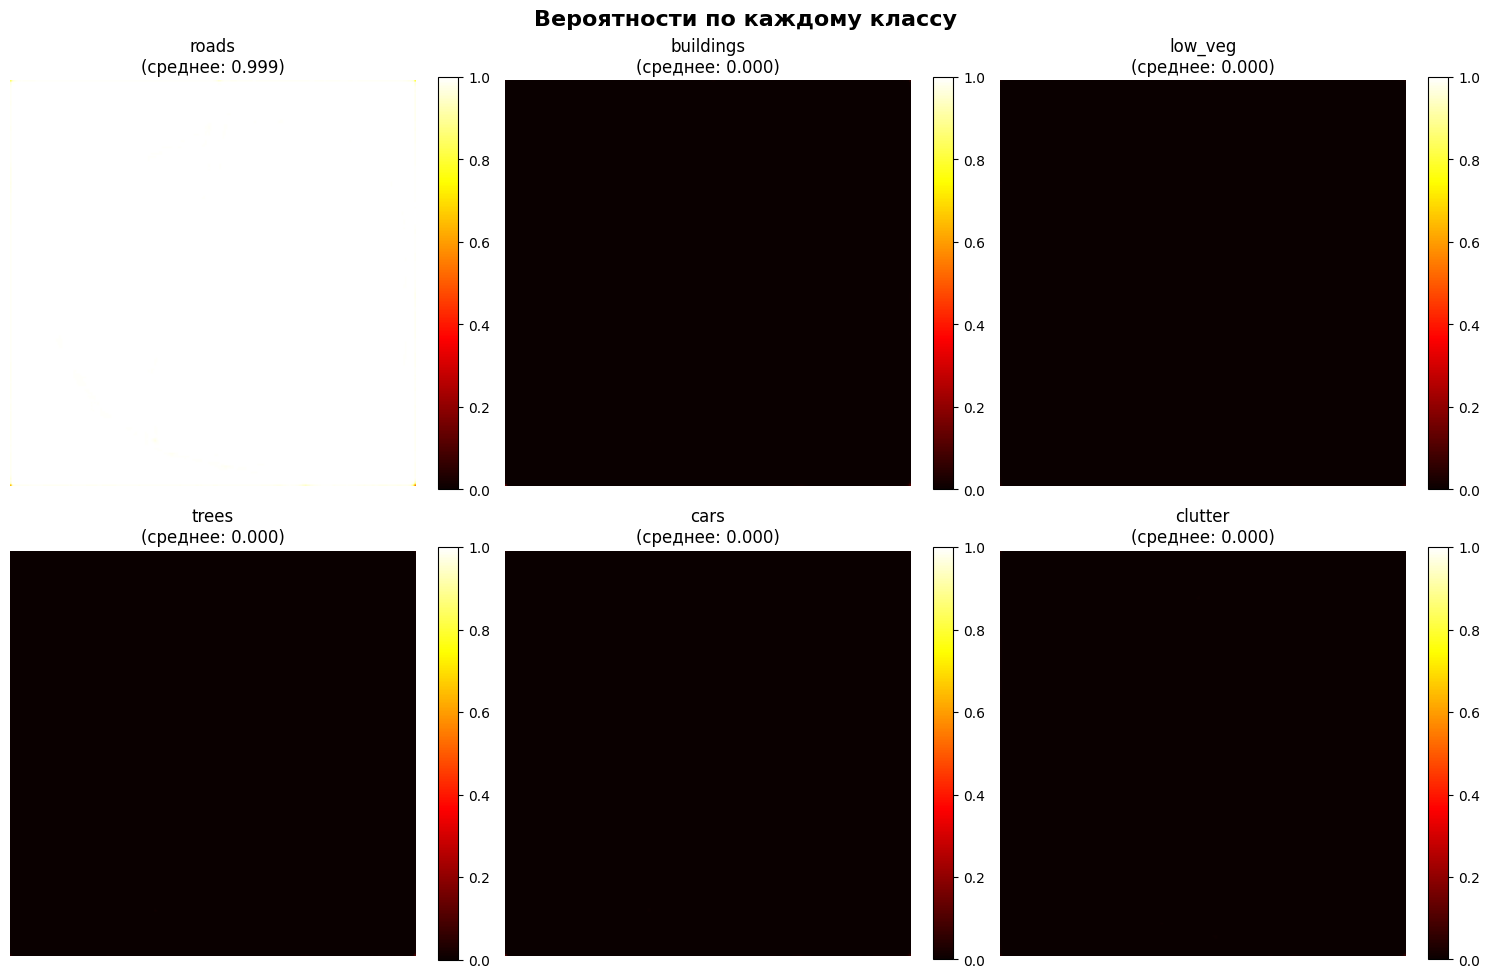


💾 Карты вероятностей сохранены в: results/class_probabilities.png

⚠️  АНАЛИЗ ПРОБЛЕМ:
   🔴 КРИТИЧНО: Модель предсказывает только ОДИН класс!
   Причины:
      1. Модель загрузилась некорректно (только архитектура без весов)
      2. Модель сильно переобучена
      3. Проблема с предобработкой данных

   💡 Решение:
      - Проверьте, что модель загрузилась с весами (compile=False)
      - Убедитесь, что используется та же предобработка, что при обучении


In [ ]:
# ============================================================
# ДИАГНОСТИКА: Почему модель предсказывает только белый цвет?
# ============================================================

if test_image_path and os.path.exists(test_image_path):
    print("🔬 ДИАГНОСТИКА МОДЕЛИ\n")
    
    # Загружаем тестовое изображение
    test_img = cv2.imread(test_image_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (IMG_WIDTH, IMG_HEIGHT))
    
    # Предобработка
    test_img_processed = scaler.fit_transform(test_img.reshape(-1, test_img.shape[-1])).reshape(test_img.shape)
    test_img_processed = preprocess_input(test_img_processed)
    test_img_processed = np.expand_dims(test_img_processed, axis=0)
    
    # Получаем предсказание
    prediction = model.predict(test_img_processed, verbose=0)
    
    print("📊 Анализ предсказания:")
    print(f"   Shape: {prediction.shape}")
    print(f"   Min: {prediction.min():.6f}")
    print(f"   Max: {prediction.max():.6f}")
    print(f"   Mean: {prediction.mean():.6f}")
    
    # Проверяем распределение по классам
    print("\n📈 Средняя вероятность по каждому классу:")
    class_names = ['roads', 'buildings', 'low_veg', 'trees', 'cars', 'clutter']
    for i, name in enumerate(class_names):
        avg_prob = prediction[0, :, :, i].mean()
        max_prob = prediction[0, :, :, i].max()
        print(f"   {name:12}: среднее={avg_prob:.4f}, максимум={max_prob:.4f}")
    
    # Получаем финальную маску
    mask = np.argmax(prediction[0], axis=-1)
    unique, counts = np.unique(mask, return_counts=True)
    
    print("\n🎨 Предсказанные классы (пиксели):")
    total = mask.size
    for class_id, count in zip(unique, counts):
        pct = count/total*100
        print(f"   {class_names[class_id]:12} (класс {class_id}): {count:,} пикселей ({pct:.2f}%)")
    
    # Визуализация вероятностей по каждому классу
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Вероятности по каждому классу', fontsize=16, fontweight='bold')
    
    for i, (ax, name) in enumerate(zip(axes.flat, class_names)):
        prob_map = prediction[0, :, :, i]
        im = ax.imshow(prob_map, cmap='hot', vmin=0, vmax=1)
        ax.set_title(f'{name}\n(среднее: {prob_map.mean():.3f})', fontsize=12)
        ax.axis('off')
        plt.colorbar(im, ax=ax, fraction=0.046)
    
    plt.tight_layout()
    plt.savefig('results/class_probabilities.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n💾 Карты вероятностей сохранены в: results/class_probabilities.png")
    
    # ПРОВЕРКА: Возможные проблемы
    print("\n⚠️  АНАЛИЗ ПРОБЛЕМ:")
    
    if len(unique) == 1:
        print("   🔴 КРИТИЧНО: Модель предсказывает только ОДИН класс!")
        print("   Причины:")
        print("      1. Модель загрузилась некорректно (только архитектура без весов)")
        print("      2. Модель сильно переобучена")
        print("      3. Проблема с предобработкой данных")
        print("\n   💡 Решение:")
        print("      - Проверьте, что модель загрузилась с весами (compile=False)")
        print("      - Убедитесь, что используется та же предобработка, что при обучении")
    elif len(unique) <= 3:
        print("   ⚠️  ВНИМАНИЕ: Модель предсказывает только {len(unique)} класса из 6")
        print("   Модель может быть переобучена на валидационной выборке")
    else:
        print("   ✅ Модель предсказывает {len(unique)} классов - всё в норме")


In [ ]:
# ============================================================
# ТЕСТИРОВАНИЕ НА НЕСКОЛЬКИХ ИЗОБРАЖЕНИЯХ
# ============================================================

import glob
import random
import os

# Создаем папку для результатов
os.makedirs('results', exist_ok=True)

print("🔍 Поиск тестовых изображений для массовой проверки...\n")

# Автоматический поиск папки с изображениями
possible_folders = [
    '/content/datasets/val/Images/data/',
    '/content/datasets/train/Images/data/',
    '/content/datasets/patches/Images/',
]

image_files = []
test_folder = None

for folder in possible_folders:
    files = glob.glob(os.path.join(folder, '*.tif'))
    if files:
        image_files = files[:12]  # Берем до 12 изображений
        test_folder = folder
        print(f"✅ Найдено {len(files)} изображений в: {folder}")
        print(f"📊 Будем тестировать на 6 случайных изображениях\n")
        break

if not image_files:
    print(f"❌ Изображения не найдены")
    print("💡 Проверьте структуру папок в /content/datasets/")
else:
    # Выбираем случайные 6 изображений
    random.shuffle(image_files)
    sample_files = image_files[:6]
    
    # Визуализация
    fig, axes = plt.subplots(6, 3, figsize=(15, 30))
    
    for idx, img_path in enumerate(sample_files):
        print(f"⚙️  [{idx+1}/6] {os.path.basename(img_path)}")
        
        # Предобработка и предсказание
        processed_img, original_img, _ = preprocess_image(img_path)
        prediction = model.predict(processed_img, verbose=0)
        mask = decode_prediction(prediction)
        rgb_mask = mask_to_rgb(mask)
        
        # Оригинал
        axes[idx, 0].imshow(cv2.resize(original_img, (IMG_WIDTH, IMG_HEIGHT)))
        axes[idx, 0].set_title(f'Image {idx+1}', fontsize=10)
        axes[idx, 0].axis('off')
        
        # Предсказание
        axes[idx, 1].imshow(rgb_mask)
        axes[idx, 1].set_title('Prediction', fontsize=10)
        axes[idx, 1].axis('off')
        
        # Наложение
        overlay = cv2.resize(original_img, (IMG_WIDTH, IMG_HEIGHT)).copy()
        overlay = cv2.addWeighted(overlay, 0.6, rgb_mask, 0.4, 0)
        axes[idx, 2].imshow(overlay)
        axes[idx, 2].set_title('Overlay', fontsize=10)
        axes[idx, 2].axis('off')
    
    plt.tight_layout()
    plt.savefig('results/multiple_predictions.png', dpi=150, bbox_inches='tight')
    print("\n💾 Результаты сохранены в: results/multiple_predictions.png")
    plt.show()
    
    print("✅ Тестирование завершено!")

In [ ]:
# ============================================================
# ЛЕГЕНДА ЦВЕТОВ КЛАССОВ
# ============================================================

import os
os.makedirs('results', exist_ok=True)

fig, ax = plt.subplots(figsize=(10, 3))

# Создаем образцы цветов
colors = [
    COLOR_SCHEME['roads'],
    COLOR_SCHEME['buildings'],
    COLOR_SCHEME['low_veg'],
    COLOR_SCHEME['trees'],
    COLOR_SCHEME['cars'],
    COLOR_SCHEME['clutter']
]

class_names = ['Roads', 'Buildings', 'Low Vegetation', 'Trees', 'Cars', 'Clutter']

# Рисуем цветовые блоки
for i, (color, name) in enumerate(zip(colors, class_names)):
    # Нормализуем цвет для matplotlib (0-1)
    color_norm = np.array(color) / 255.0
    
    # Рисуем квадрат
    square = plt.Rectangle((i, 0), 0.8, 0.5, 
                           facecolor=color_norm, 
                           edgecolor='black', 
                           linewidth=2)
    ax.add_patch(square)
    
    # Добавляем название
    ax.text(i + 0.4, 0.25, name, 
           ha='center', va='center', 
           fontsize=12, fontweight='bold',
           color='white' if i in [1, 5] else 'black')  # Белый текст для темных цветов

ax.set_xlim(-0.5, len(colors))
ax.set_ylim(-0.5, 1)
ax.axis('off')
ax.set_title('Цветовая схема классов', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('results/color_legend.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Легенда сохранена в: results/color_legend.png")